## Go through amazon topical chat dataset (link: https://github.com/alexa/alexa-prize-topical-chat-dataset) and build NLP model to derive useful insight(s).

## Text Classification NLP model by Sumit Mishra

In [1]:
# Importing the libraries
import json
import pandas as pd
import re
import nltk
from nltk import *
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import time
import warnings
warnings.filterwarnings('ignore')

# Rading the JSON file
with open('train.json') as f:
  data = json.load(f)

# Length of the data
len(data)

8628

In [3]:
# Changing the JSON data to csv
df = pd.DataFrame.from_dict(data, orient = 'index')
df.shape

(8628, 4)

In [4]:
df.head()

,article_url,config,content,conversation_rating
t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,[{'message': 'Are you a fan of Google or Micro...,"{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
t_1abc9c37-387d-4013-8691-88ef8c010e58,https://www.washingtonpost.com/entertainment/t...,B,"[{'message': 'do you like dance?', 'agent': 'a...","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
t_1a600621-5ad4-409c-a812-bc0b2bb03aa6,https://www.washingtonpost.com/blogs/compost/w...,C,[{'message': 'Hey what's up do use Google very...,"{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
t_01269680-99c3-4ab4-9df3-23901e0623c9,https://www.washingtonpost.com/entertainment/t...,C,"[{'message': 'Hi! do you like to dance?', 'ag...","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
t_c4f84350-a9e8-4928-bde8-5193b62388e0,https://www.washingtonpost.com/entertainment/t...,B,"[{'message': 'do you like dance?', 'agent': 'a...","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"


In [5]:
# Resetting the index
df.reset_index(inplace = True)
df.head()

,index,article_url,config,content,conversation_rating
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,[{'message': 'Are you a fan of Google or Micro...,"{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
1,t_1abc9c37-387d-4013-8691-88ef8c010e58,https://www.washingtonpost.com/entertainment/t...,B,"[{'message': 'do you like dance?', 'agent': 'a...","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
2,t_1a600621-5ad4-409c-a812-bc0b2bb03aa6,https://www.washingtonpost.com/blogs/compost/w...,C,[{'message': 'Hey what's up do use Google very...,"{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
3,t_01269680-99c3-4ab4-9df3-23901e0623c9,https://www.washingtonpost.com/entertainment/t...,C,"[{'message': 'Hi! do you like to dance?', 'ag...","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"
4,t_c4f84350-a9e8-4928-bde8-5193b62388e0,https://www.washingtonpost.com/entertainment/t...,B,"[{'message': 'do you like dance?', 'agent': 'a...","{'agent_1': 'Excellent', 'agent_2': 'Excellent'}"


In [6]:
# Changing the conversation rating dictionary in to data frame
df_1 = df['conversation_rating'].apply(pd.Series)
df = pd.concat([df.drop(columns = ['conversation_rating']), df_1], axis = 1)

In [7]:
df.head()

,index,article_url,config,content,agent_1,agent_2
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,[{'message': 'Are you a fan of Google or Micro...,Excellent,Excellent
1,t_1abc9c37-387d-4013-8691-88ef8c010e58,https://www.washingtonpost.com/entertainment/t...,B,"[{'message': 'do you like dance?', 'agent': 'a...",Excellent,Excellent
2,t_1a600621-5ad4-409c-a812-bc0b2bb03aa6,https://www.washingtonpost.com/blogs/compost/w...,C,[{'message': 'Hey what's up do use Google very...,Excellent,Excellent
3,t_01269680-99c3-4ab4-9df3-23901e0623c9,https://www.washingtonpost.com/entertainment/t...,C,"[{'message': 'Hi! do you like to dance?', 'ag...",Excellent,Excellent
4,t_c4f84350-a9e8-4928-bde8-5193b62388e0,https://www.washingtonpost.com/entertainment/t...,B,"[{'message': 'do you like dance?', 'agent': 'a...",Excellent,Excellent


In [8]:
# Change the list of the conversation into different rows as per the messag3e
df = df.explode('content')

# Resetting the index
df.reset_index(drop = True, inplace = True)

In [9]:
df.head()

,index,article_url,config,content,agent_1,agent_2
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,{'message': 'Are you a fan of Google or Micros...,Excellent,Excellent
1,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,{'message': 'Both are excellent technology the...,Excellent,Excellent
2,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,"{'message': 'I'm not a huge fan of Google, bu...",Excellent,Excellent
3,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,{'message': 'Google provides online related se...,Excellent,Excellent
4,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,"{'message': 'Yeah, their services are good. I'...",Excellent,Excellent


In [10]:
df.iloc[1, 3]

{'message': 'Both are excellent technology they are helpful in many ways. For the security purpose both are super.',
 'agent': 'agent_2',
 'sentiment': 'Curious to dive deeper',
 'knowledge_source': ['FS1'],
 'turn_rating': 'Excellent'}

In [11]:
# Changing the dictionary of the messages to different column named the keys of the dictionary
df_1 = df['content'].apply(pd.Series)
df = pd.concat([df.drop(columns = ['content']), df_1], axis = 1)

In [12]:
df.head()

,index,article_url,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,Excellent,Excellent,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good
1,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,Excellent,Excellent,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent
2,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,Excellent,Excellent,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good
3,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,Excellent,Excellent,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent
4,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,https://www.washingtonpost.com/blogs/compost/w...,C,Excellent,Excellent,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good


In [13]:
# unique article urls
df['article_url'].nunique()

2488

In [14]:
# This regular expression will change find all the required https , wwws, website and the url part after the website
# and convert all these into a tuple
df['article_url'] = df['article_url'].str.findall(r"((http\://|https\://|ftp\://)|(www.))+(([a-zA-Z0-9\.-]+\.[a-zA-Z]{2,4})|([0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}\.[0-9]{1,3}))(/[a-zA-Z0-9%:/-_\?\.'~]*)?")

In [15]:
df.head()

,index,article_url,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"[(www., https://, www., washingtonpost.com, wa...",C,Excellent,Excellent,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good
1,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"[(www., https://, www., washingtonpost.com, wa...",C,Excellent,Excellent,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent
2,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"[(www., https://, www., washingtonpost.com, wa...",C,Excellent,Excellent,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good
3,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"[(www., https://, www., washingtonpost.com, wa...",C,Excellent,Excellent,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent
4,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"[(www., https://, www., washingtonpost.com, wa...",C,Excellent,Excellent,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good


In [16]:
# changing those list of the articles
df = df.explode('article_url')
df.head()

,index,article_url,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good
1,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent
2,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good
3,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent
4,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good


In [17]:
df['article_url'][0]

('www.',
 'https://',
 'www.',
 'washingtonpost.com',
 'washingtonpost.com',
 '',
 '/blogs/compost/wp/2018/04/05/endangered')

In [18]:
# Now using apply function to take certain element of the tuple that is website name
df['website'] = df['article_url'].apply(lambda col: col[3])

# Now using apply function to take certain element of the tuple that is the other part of the url, this can be used to know
# the genre of the article
df['type'] = df['article_url'].apply(lambda col: col[6])

In [19]:
df.head()

,index,article_url,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating,website,type
0,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,/blogs/compost/wp/2018/04/05/endangered
1,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,/blogs/compost/wp/2018/04/05/endangered
2,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,/blogs/compost/wp/2018/04/05/endangered
3,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,/blogs/compost/wp/2018/04/05/endangered
4,t_bde29ce2-4153-4056-9eb7-f4ad710505fe,"(www., https://, www., washingtonpost.com, was...",C,Excellent,Excellent,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,/blogs/compost/wp/2018/04/05/endangered


In [20]:
# Now taking only the genre part
df['type'] = df['type'].apply(lambda x: x.split('/')[1].strip())

In [21]:
df.drop(columns = ['index', 'article_url'], inplace = True)
df.head()

,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating,website,type
0,C,Excellent,Excellent,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs
1,C,Excellent,Excellent,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,blogs
2,C,Excellent,Excellent,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs
3,C,Excellent,Excellent,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,blogs
4,C,Excellent,Excellent,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs


In [22]:
# The types of genres here are
print (df['type'].unique())

['blogs' 'entertainment' 'news' 'lifestyle' 'national' 'politics'
 'outlook' 'opinions' 'local' 'world' 'goingoutguide' 'arts' 'express'
 'sports' 'business' 'technology' 'science' 'religion' 'history' 'dc'
 'investigations' 'bon' 'nation' 'health' 'realestate' 'brand' 'this'
 'lordes' 'conversations' 'weather' 'crime' 'education' 'transportation'
 'pr']


In [23]:
# Null value in the dataframe
df.isnull().sum(axis = 0)

config              0
agent_1             0
agent_2             0
message             0
agent               0
sentiment           0
knowledge_source    0
turn_rating         0
website             0
type                0
dtype: int64

In [24]:
df['turn_rating'].unique()

array(['Good', 'Excellent', '', 'Passable', 'Poor', 'Not Good'],
      dtype=object)

In [25]:
df['type'].value_counts()

news              71877
sports            16831
entertainment     14083
lifestyle         13728
local             11878
opinions           9811
express            9473
goingoutguide      6628
blogs              5809
national           5378
business           4302
world              3903
politics           3674
arts               3145
outlook            1674
science            1331
nation             1319
technology          914
dc                  438
realestate          391
religion            277
investigations      238
history             200
education           187
pr                  182
crime               110
health              109
brand                90
bon                  90
lordes               88
this                 72
transportation       64
weather              42
conversations        42
Name: type, dtype: int64

In [26]:
list(df['sentiment'].unique())

['Curious to dive deeper',
 'Happy',
 'Neutral',
 'Surprised',
 'Disgusted',
 'Sad',
 'Fearful',
 'Angry']

## Exploratory Data Analysis

The sentiment for the wordcloud 1 is Curious to dive deeper
The sentiment for the wordcloud 2 is Happy
The sentiment for the wordcloud 3 is Neutral
The sentiment for the wordcloud 4 is Surprised
The sentiment for the wordcloud 5 is Disgusted
The sentiment for the wordcloud 6 is Sad
The sentiment for the wordcloud 7 is Fearful
The sentiment for the wordcloud 8 is Angry


<Figure size 1440x1080 with 0 Axes>

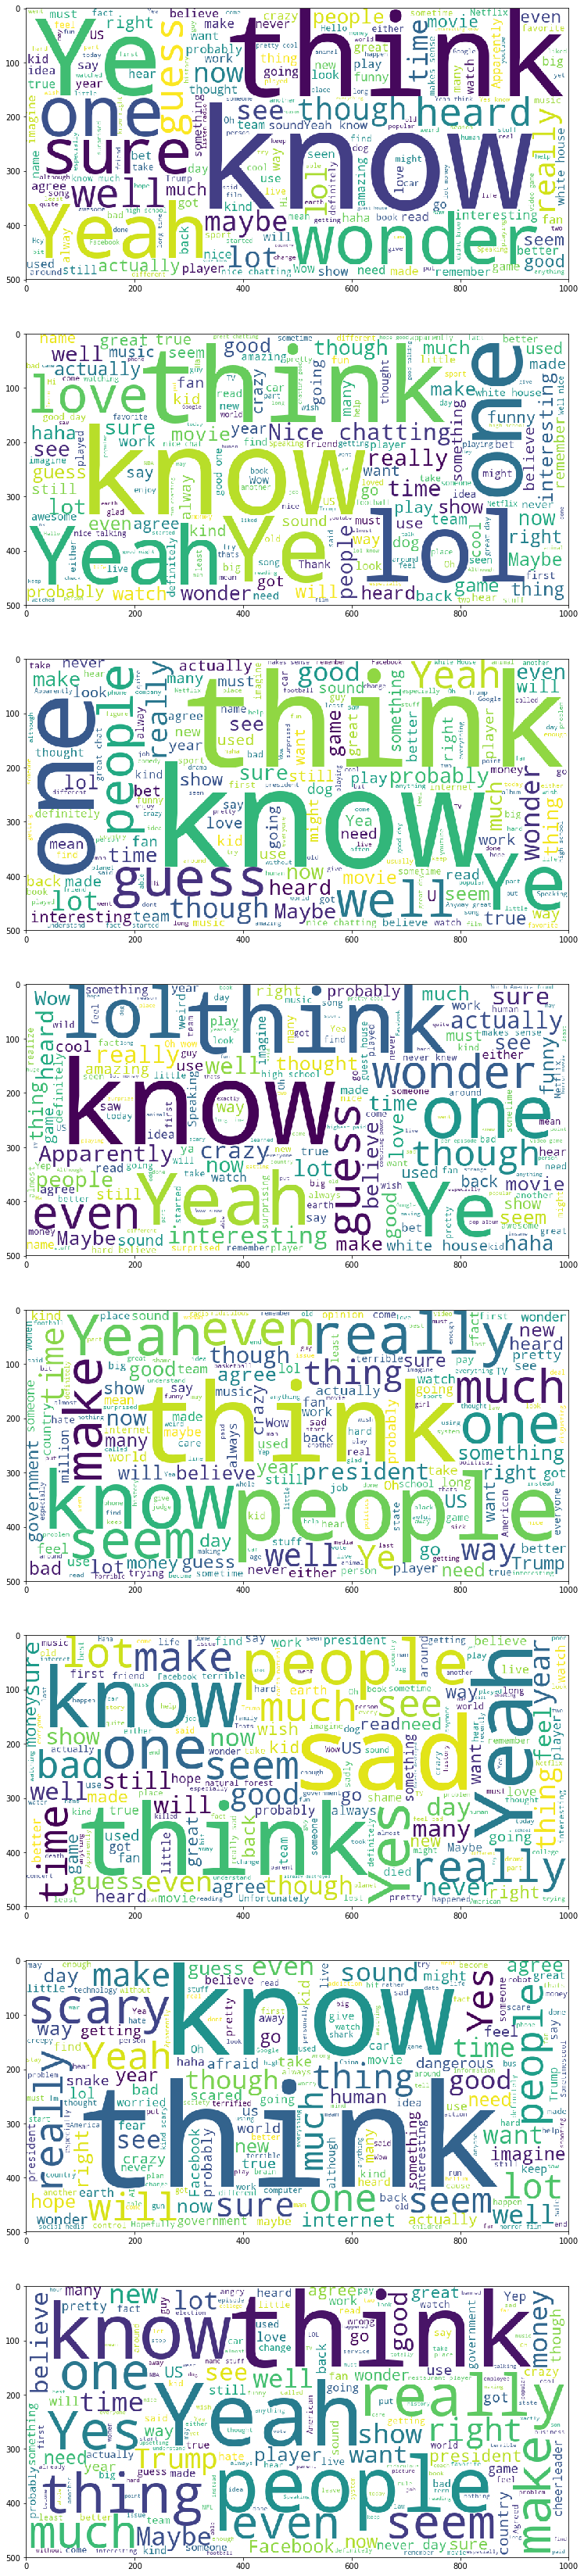

In [27]:
# These are the wordclouds for the sentiments given in the dataset

plt.figure(figsize = [20,15])
fig, ax = plt.subplots(8, 1, figsize=(15, 60))
list_sentiment = list(df['sentiment'].unique())

for i, sentiment in enumerate(list_sentiment):
    if i!=8:
        data_frame = df.loc[df['sentiment'] == sentiment, 'message']
        joint = (' '.join(data_frame))
        wordcloud = WordCloud(height = 500, width = 1000, background_color = 'white').generate(joint)
        print ("The sentiment for the wordcloud {} is {}".format(i+1, sentiment))
        time.sleep(0.01)
        ax[i].imshow(wordcloud)
    else:
        break

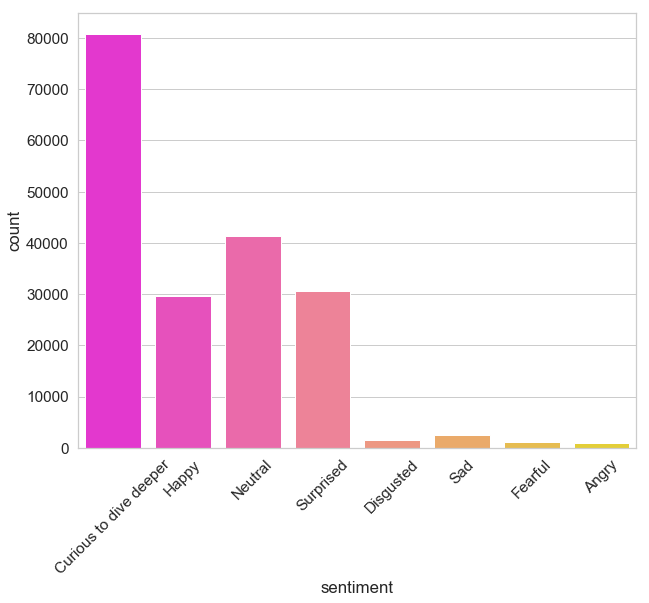

In [28]:
# This bargraph shows the count of the sentiment in the dataset
plt.rcParams['figure.figsize'] = [10,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
sns_sentiment = sns.countplot(x = df['sentiment'], data = df, palette = 'spring')
plt.setp(sns_sentiment.get_xticklabels(), rotation = 45);

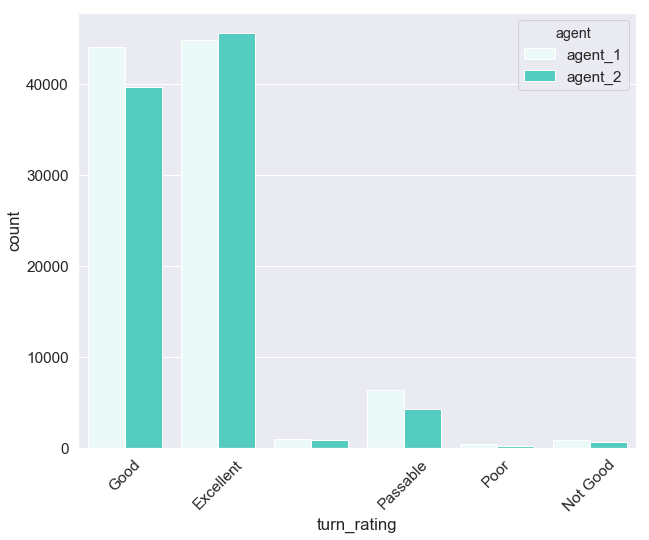

In [29]:
# This bargrap show the occurence of the turn rating given according to the agents
sns.set(style = 'darkgrid', font_scale = 1.4)
sns_turn = sns.countplot(x = df['turn_rating'], data = df, color = 'turquoise', hue = 'agent')
plt.setp(sns_turn.get_xticklabels(), rotation = 45);

In [30]:
# All the information of the dataset is taken from the WashingtonPost site
df['website'].nunique()

1

In [31]:
df.head()

,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating,website,type
0,C,Excellent,Excellent,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs
1,C,Excellent,Excellent,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,blogs
2,C,Excellent,Excellent,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs
3,C,Excellent,Excellent,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,blogs
4,C,Excellent,Excellent,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs


In [32]:
# Creating Pandas Series for the types given in the dataset
plt.rcParams['figure.figsize'] = [17, 17]
types = df['type'].value_counts()
labels = list(types.index)
aggregate = list(types)
percentage = [(x*100)/sum(aggregate) for x in aggregate]
print (percentage)

[38.1557294376201, 8.934695134251346, 7.475926063553069, 7.287475182876982, 6.305407213156526, 5.208145324825616, 5.028718852519933, 3.5184575693552325, 3.083693424922231, 2.8548981303549246, 2.28370616526346, 2.0718979923345615, 1.950333903109705, 1.6695155485247746, 0.8886388007092123, 0.7065580906475278, 0.7001879200331249, 0.48519466179702514, 0.23251122742570787, 0.2075613925192963, 0.14704477168246824, 0.12634171718565862, 0.10616951024004927, 0.09926849207444606, 0.09661425431844482, 0.058393230632027095, 0.05786238308082685, 0.047776279608022165, 0.047776279608022165, 0.04671458450562167, 0.038221023686417735, 0.033974243276815766, 0.022295597150410344, 0.022295597150410344]


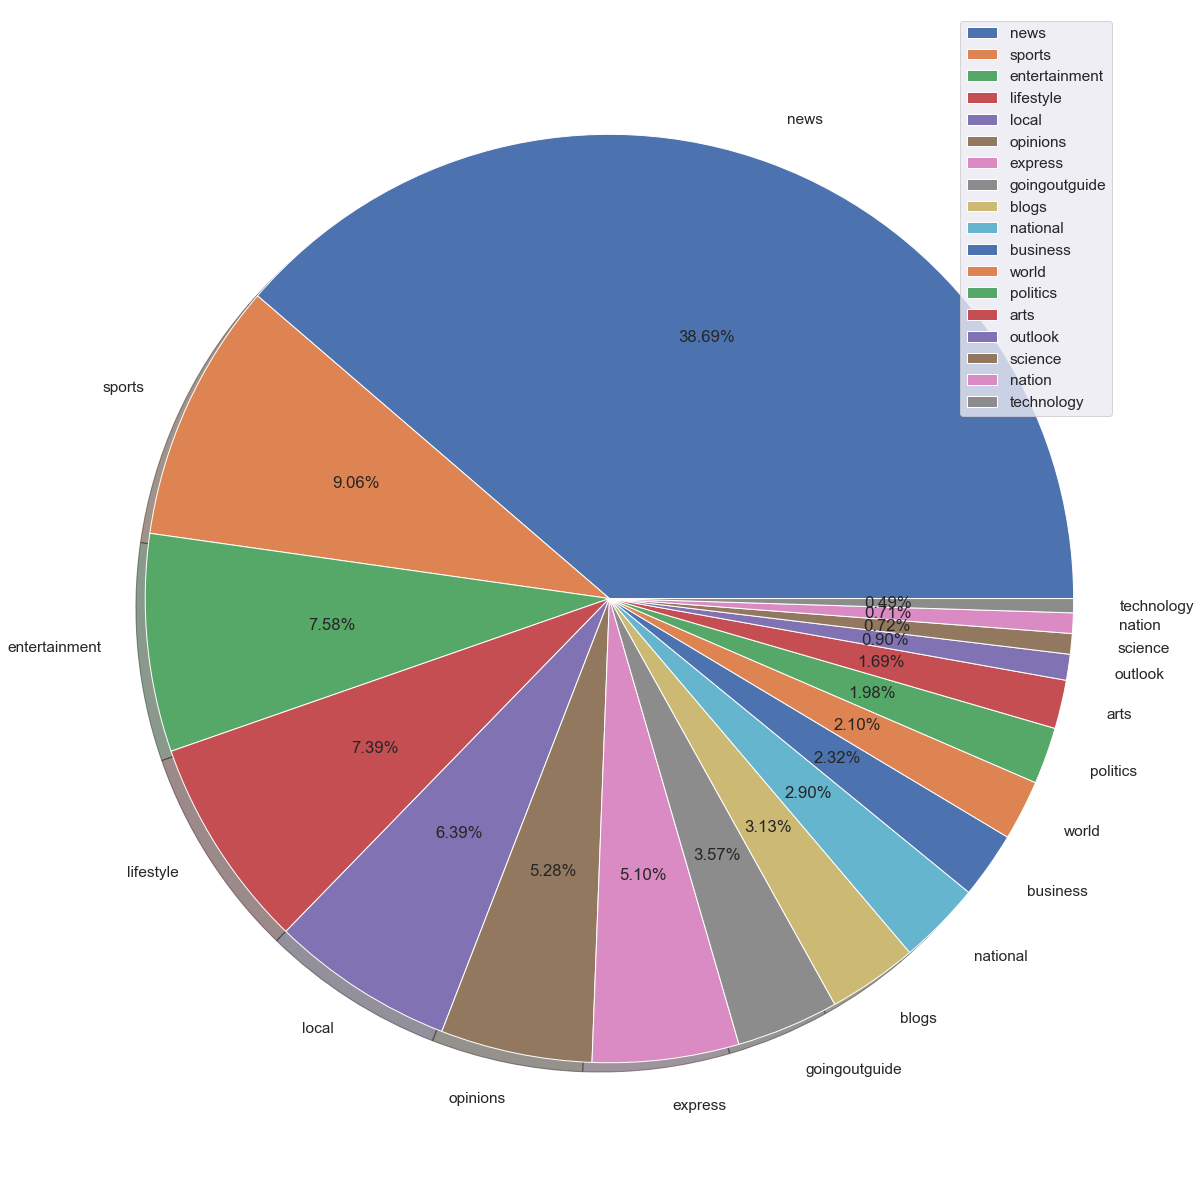

In [33]:
# This Pie chat shows the Percentage of different types of the genre from where the information is given
plt.pie(aggregate[0:18], labels = labels[0:18], autopct='%1.2f%%', shadow=True)
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [34]:
df['config'].nunique()

4

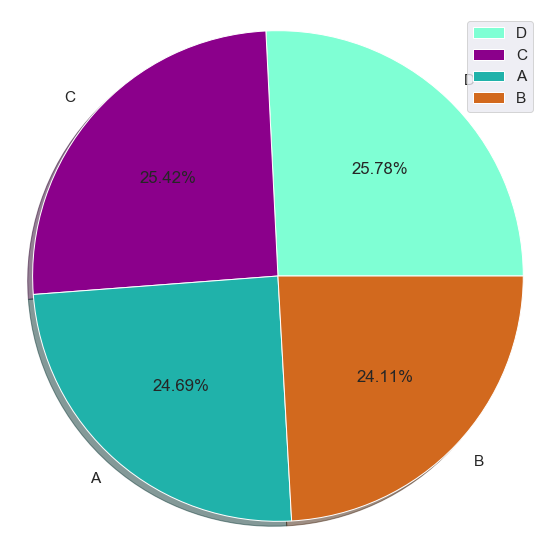

In [35]:
# Creating Pandas Series for the CONFIG given in the dataset
plt.rcParams['figure.figsize'] = [8, 8]
configs = df['config'].value_counts()
labels = list(configs.index)
aggregate = list(configs)

# This Pie chat shows the Percentage of different types of the CONFIG from where the information is given
plt.pie(aggregate, labels = labels, autopct='%1.2f%%', shadow=True, colors = ['aquamarine', 'darkmagenta', 'lightseagreen', 'chocolate'])
plt.legend(labels, loc = 'best')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Preprocessing and NLP Modelling

In [36]:
def message(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Removing all the special Characters
    special_remove = lower.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [37]:
df['message_clean'] = message(df['message'])
df['message_clean']

0                      are you a fan of google or microsoft
1         both are excellent technology they are helpful...
2         i m not a huge fan of google but i use it a lo...
3         google provides online related services and pr...
4         yeah their services are good i m just not a fa...
                                ...                        
188373    wow it does not seem like that long since i me...
188374    i havent seen that episode i might google it l...
188375    i don t think i have either that s an insane a...
188376    i did my little brother used to love thomas th...
188377    it did ringo starr george carlin and alec bald...
Name: message_clean, Length: 188378, dtype: object

In [38]:
df.head()

,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating,website,type,message_clean
0,C,Excellent,Excellent,Are you a fan of Google or Microsoft?,agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs,are you a fan of google or microsoft
1,C,Excellent,Excellent,Both are excellent technology they are helpful...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,blogs,both are excellent technology they are helpful...
2,C,Excellent,Excellent,"I'm not a huge fan of Google, but I use it a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs,i m not a huge fan of google but i use it a lo...
3,C,Excellent,Excellent,Google provides online related services and pr...,agent_2,Curious to dive deeper,[FS1],Excellent,washingtonpost.com,blogs,google provides online related services and pr...
4,C,Excellent,Excellent,"Yeah, their services are good. I'm just not a ...",agent_1,Curious to dive deeper,[FS1],Good,washingtonpost.com,blogs,yeah their services are good i m just not a fa...


In [39]:
# Removing the stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['message_clean'] = df['message_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [40]:
# Stemming the words
from nltk.stem import SnowballStemmer

SS = SnowballStemmer('english')
df['message_clean'] = df['message_clean'].apply(lambda x: ' '.join(SS.stem(word) for word in x.split()))

In [41]:
# Converting all the categorical features in to Numerical features for the training purpose.
from sklearn.preprocessing import LabelEncoder
dict_encoder = {}
for features in ['config', 'agent', 'sentiment', 'turn_rating', 'type', 'agent_1', 'agent_2']:
    dict_encoder[features] = LabelEncoder()
    df[features] = dict_encoder[features].fit_transform(df[features])

In [42]:
df.head()

,config,agent_1,agent_2,message,agent,sentiment,knowledge_source,turn_rating,website,type,message_clean
0,2,1,1,Are you a fan of Google or Microsoft?,0,1,[FS1],2,washingtonpost.com,1,fan googl microsoft
1,2,1,1,Both are excellent technology they are helpful...,1,1,[FS1],1,washingtonpost.com,1,excel technolog help mani way secur purpos super
2,2,1,1,"I'm not a huge fan of Google, but I use it a ...",0,1,[FS1],2,washingtonpost.com,1,huge fan googl use lot think monopoli sens
3,2,1,1,Google provides online related services and pr...,1,1,[FS1],1,washingtonpost.com,1,googl provid onlin relat servic product includ...
4,2,1,1,"Yeah, their services are good. I'm just not a ...",0,1,[FS1],2,washingtonpost.com,1,yeah servic good fan intrus person live


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

X_train, X_test, y_train, y_test = train_test_split(df[['config', 'agent', 'type', 'turn_rating', 'agent_1', 'agent_2']], df['sentiment'],
                                                  test_size = 0.30, random_state = 0)

print ("The train set shape is : ", X_train.shape)
print ("The test set shape is : ", X_test.shape)

The train set shape is :  (131864, 6)
The test set shape is :  (56514, 6)


In [44]:
xgb = XGBClassifier(n_estimator = 5000, learning_rate = 0.05)
model = xgb.fit(X_train, y_train)

predictions = model.predict(X_test)
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))

0.4330608344834908
[[    0   245     0     0     0     9     0     0]
 [    0 24092     0     0     2   268     0     0]
 [    0   420     0     0     1    22     0     0]
 [    0   314     0     0     0     7     0     0]
 [    0  8766     0     0    35   150     0     0]
 [    0 11907     0     0     9   347     0     0]
 [    0   725     0     0     0    16     0     0]
 [    0  9031     0     0     2   146     0     0]]


In [45]:
clf = LGBMClassifier(n_estimator = 10000)
model_1 = clf.fit(X_train, y_train)

predictions_1 = model_1.predict(X_test)
print (accuracy_score(y_test, predictions_1))
print (confusion_matrix(y_test, predictions_1))

0.4391124323176558
[[    1   237     2     0     1    13     0     0]
 [    1 23784     1     0    65   496     0    15]
 [    0   402     2     0     4    33     0     2]
 [    0   305     0     1     2    12     0     1]
 [    0  8460     0     1   215   270     0     5]
 [    1 11419     8     0    51   778     0     6]
 [    0   705     0     0     5    30     1     0]
 [    0  8859     2     0    36   246     2    34]]


## Bag Of Words

In [46]:
from nltk.tokenize import word_tokenize

# Creating a Bag of Words
words = []
for text in df['message_clean']:
    word = word_tokenize(text)
    for i in word:
        words.append(i)

In [47]:
from nltk.probability import FreqDist

words = nltk.FreqDist(words)
print ("Total Number of words {}".format(len(words)))
print ("First 30 most common words {}".format(words.most_common(30)))

Total Number of words 24739
First 30 most common words [('know', 32709), ('like', 31874), ('think', 20504), ('would', 19234), ('yeah', 16205), ('good', 14267), ('yes', 13864), ('one', 13729), ('use', 11593), ('realli', 11030), ('wonder', 10865), ('watch', 10247), ('lol', 9738), ('well', 9571), ('make', 9455), ('lot', 9244), ('get', 9167), ('peopl', 8888), ('time', 8768), ('much', 8653), ('interest', 8639), ('play', 8638), ('great', 8248), ('sure', 8107), ('also', 7944), ('guess', 7899), ('go', 7531), ('year', 7520), ('though', 7323), ('love', 7305)]


In [55]:
# Choosing the first 1000 words as Features
word_features = list(words.keys())[:1000]
word_features[0:20]

['fan',
 'googl',
 'microsoft',
 'excel',
 'technolog',
 'help',
 'mani',
 'way',
 'secur',
 'purpos',
 'super',
 'huge',
 'use',
 'lot',
 'think',
 'monopoli',
 'sens',
 'provid',
 'onlin',
 'relat']

In [56]:
# Finding if a word in the word_features is present in the messages
def finding_features(message):
    text = word_tokenize(message)
    features={}
    for i in word_features:
        features[i] = (i in text)
    return features

# Zipping the Processed messages with the Labels
message_featlab = zip(df['message_clean'], df['sentiment'])

In [57]:
# Calling the finding_feature function for all the messages
feature_set = [(finding_features(TW) ,label) for (TW,label) in message_featlab]

In [58]:
# Splitting Training and Testing Datasets
train, test = train_test_split(feature_set, test_size = 0.40, random_state = 1)

print ('Training set Size: {}'.format(len(train)))
print ('Testing set Size: {}'.format(len(test)))

Training set Size: 113026
Testing set Size: 75352


In [59]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from nltk.classify.scikitlearn import SklearnClassifier

# Stochastic Gradient Descent
nltk_model = SklearnClassifier(SGDClassifier(max_iter = 1000))
nltk_model.train(train)

accuracy = nltk.classify.accuracy(nltk_model, test)*100
print ("The accuracy of the SGDC is ", accuracy)

The accuracy of the SGDC is  44.29610362034187


In [60]:
# Logistic Regression
nltk_model_2 = SklearnClassifier(LogisticRegression())
nltk_model_2.train(train)

accuracy = nltk.classify.accuracy(nltk_model_2, test)*100
print ("The accuracy of the Losgistics Regression is ", accuracy)

The accuracy of the Losgistics Regression is  46.078405350886506
